In [8]:
'''
SVM is one of the most popular machine learning algorithms, and there are several forms of SVMs
Large Margin Classification - separates two classes, but also stays as far away from the closest training instances
Hard Margin Classification - instances must be "off the street", does not work if data is not linearly separable
Soft Margin Classification - balance between wide street and limiting margin violations
In scikit learn SVM classes, C hyperparameter determines which form of classification you use.
A smaller C value leads to a wider street but more margin violations. 
Note: If the SVM model is overfitting, you can try regularizing it by reducing C
'''
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

np.random.seed(42)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length and width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

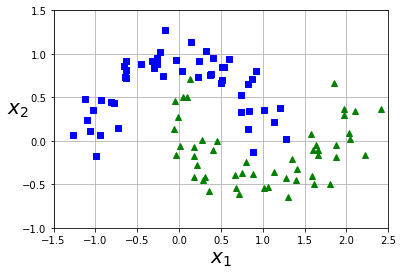

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [14]:
'''
If you need to handle very large datasets, can use a SGDClassifier(loss="hinge", alpha=1/(m*C)). This will
apply Stochastic Gradient Descent to train a linear SVM classifier. Used for out-of-training.

It is important to note that the LinearSVC class regularizes the bias term, so you should center the 
training set first by subtracting its mean. Automatically happens if you scale the data using the StandardScaler.

Recall that in the event our data is not linearly separable, we may add more features to try and make the
dataset linearly separable. We can do this with a Pipeline containing PolynomialFeatures transformer, followed
by a StandardScaler and a LinearSVC.
'''
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

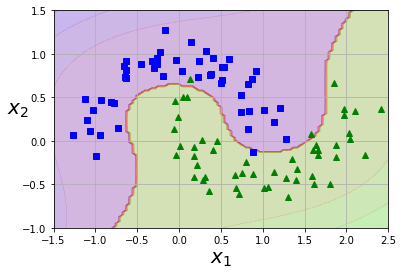

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [16]:
'''
Cons of adding polynomial features:
1) At a low polynomial degree, it cannot deal with very complex datasets
2) At a high polynomial degree, it creates a huge number of features, making the model too slow

With SVMs, we have the kernel trick to get the same result as if you added many polynomial features without
having to add them. This is done with SVC class.

To get the best hyperparameter values, use the grid search.
'''
from sklearn.svm import SVC

# coef0 hyperparameter controls how much the model is influenced by high-degree polynomials versus low-degree polynomials
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [17]:
# Can also use similarity functions, such as the Gaussian RBF kernel
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)),
])

# Increasing gamma makes the bell shape curve narrower = decision boundary is wiggling around individual instances
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [19]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [20]:
'''
Can perform linear SVM regression with Scikit-Learn's LinearSVR class. The goal of SVM Reression is to fit as 
many instances as possible on the street while limiting margin violations (instances off the street). Width of the 
street is controlled by the hyperparameter epsilon. 

Note: Adding more training instances within the margin does not affect the model's predictions; thus, the model
is said to be epsilon-insensitive
'''
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [21]:
# Can also perform a kernelized SVM model to tackle nonlinear regression tasks
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)